<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT
## SMS Spam Collection

In this assignment we will take an interesting usecase of __NLP__(Natural Language Processing), we wont dig deep into it, but just that much which is required to solve this case-study problem.

__Context__<br/>
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being __ham__ (legitimate) or __spam__.

__Content__<br/>
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.<br/>

- This corpus has been collected from free or free for research sources at the Internet:

- A collection of 425 SMS spam messages was manually extracted from the __[Grumbletext Web site](http://www.grumbletext.co.uk/)__. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.  
- A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 
- A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link](http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf). 
-  Finally, we have incorporated the [SMS Spam Corpus v.0.1 Big](http://www.esp.uem.es/jmgomez/smsspamcorpus/). It has 1,002 SMS ham messages and 322 spam messages.

### Import the dataset

In [1]:
import pandas as pd
sms = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Dropping the unwanted columns Unnamed:2, Unnamed: 3 and Unnamed:4**

In [2]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms = sms.rename(columns={"v1":"label", "v2":"sms"})

**Checking the Length of SMS**

In [3]:
print (len(sms))

5572


In [4]:
sms.tail()

,label,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


__Number of observations in each label spam and ham__

In [5]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
sms['length'] = sms['sms'].apply(len)
sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


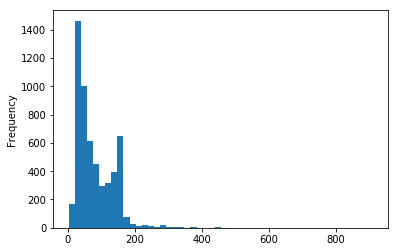

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sms['length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF4E11DC88>,
      dtype=object)

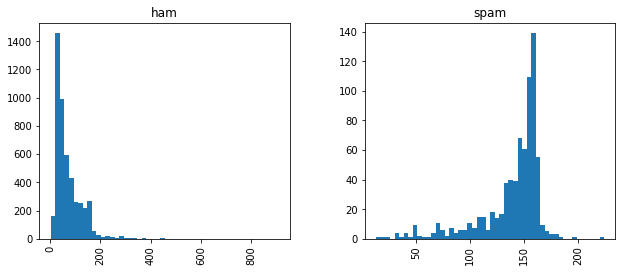

In [9]:
sms.hist(column='length', by='label', bins=50,figsize=(10,4))

In [10]:
sms.loc[:,'label'] = sms.label.map({'ham':0, 'spam':1})
print(sms.shape)
sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**Bag of Words Approach**

What we have here in our data set is a large collection of text data (5,572 rows of data). <br/>Most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy.
We need a way to represent text data for machine learning algorithm and the __bag-of-words__ model helps us to achieve that task.
- It is a way of __extracting features from the text__ for use in machine learning algorithms.
- In this approach, we use the tokenized words for each observation and find out the frequency of each token.
- Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.


__Understanding the approach using an example:__


Lets say we have 4 documents as follows:

**['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']**

Our objective here is to convert this set of text to a frequency distribution matrix, as follows:
<img src="https://image.ibb.co/casG7U/countvectorizer.png" alt="table">

Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Lets break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearns count vectorizer method which does the following:

1.  It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
2. It counts the occurrence of each of those tokens.

**Implementation of Bag of Words Approach**

Step 1: __Convert all strings to their lower case form.__

In [11]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)


['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


Step 2: __Removing all punctuations__

In [12]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

Step 3: __Tokenization__

In [13]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

Step 4: __Count frequencies__

In [14]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


### Implementing Bag of Words in scikit-learn

**Data preprocessing with CountVectorizer()**

In above step, we implemented a version of the CountVectorizer() method from scratch that entailed cleaning our data first.
- This cleaning involved converting all of our data to lower case and removing all punctuation marks.
- CountVectorizer() has certain __parameters__ which take care of these steps for us. They are:
        - lowercase = True  
        The lowercase parameter has a default value of True which converts all of our text to its lower case form.
        
        - token_pattern = (?u)\\b\\w\\w+\\b 
        The token_pattern parameter has a default regular expression value of -
        (?u)\\b\\w\\w+\\b which ignores all punctuation marks and treats them as delimiters, while accepting
        alphanumeric strings of length greater than or equal to 2, as individual tokens or words.
        
        - stop_words 
        The stop_words parameter, if set to english will remove all words from our document set that match a 
        list of English stop words which is defined in scikit-learn. Considering the size of our dataset and the fact 
        that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this 
        parameter value.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [16]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [17]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [18]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


Lets take the second row of the document, i.e., '__Win money, win from home.__' .<br/>Now by observing the second row of the frequency matrix, you can learn how values of individual element is set in the matrix.

|__Word__ | __Frequency__  |
| -------|:------      :| 
|from    | 1            |
|home    | 1            |
|money   | 1            |
|win     | 2            |

__Back to our orignal SMS dataset__

### Q 1. Extract the dependent variables to create a dataframe X.

In [ ]:
X = pd.DataFrame()
def generate():
    # Your code here
    return X
X = generate()

In [ ]:
X.head()

### Q 2. Extract the independent variable into a dataframe 'y' for model prediction.

In [ ]:
y = pd.DataFrame()
def generate():
    # Your code here
    return y
y = generate()

### Q 3. Split X and y into train and test dataset with test_size = 0.20, random_state=0.

In [ ]:
from sklearn.model_selection import train_test_split
def generate():
    return # train test split using train_test_split of 75:25 and random state=0
X_train, X_test, y_train, y_test = generate()

### Q 3.1 Check the shape of X and y of train dataset

In [ ]:
def generate():
    # Your code here
    return
generate()

### Q 3.2 Check the shape of X and y of test dataset

In [ ]:
def generate():
    # Your code here
    return
generate()

__Instantiate the CountVectorizer method__

In [ ]:
count_vector = CountVectorizer()

__Fit the model to X_train and obtaining the transformed X_train__

In [ ]:
training_data = count_vector.fit_transform(X_train)

__Transform testing data and return the matrix.__

In [ ]:
testing_data = count_vector.transform(X_test)

**Implementation of Naive Bayes Machine Learning Algorithm **

Specifically, we will be using the **multinomial Naive Bayes** implementation. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. On the other hand **Gaussian Naive Bayes** is better suited for continuous data as it assumes that the input data has a Gaussian(normal) distribution.

### Q 4. Create a Naive Bayes Machine Learning model instance by using the multinomial Naive Bayes implementation, name it as naive_bayes also fit this model to the training data.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
def generate():
    # Your code here
    return naive_bayes
naive_bayes = generate()

### Q 5. Use the models for predictions

In [ ]:
def generate():
    # Your code here
    return predictions
predictions = generate()

### Q 6. Model evaluation using accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
def generate():
    # Your code here
    return 
generate()

### Q 7. Model evaluation using confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = pd.DataFrame()

def generate():
    # Your code here
    return 
generate()

### Q 8. Model evaluation using Precision score

In [ ]:
from sklearn.metrics import precision_score
def generate():
    # Your code here
generate()

### Q 9. Model evaluation using Recall score

In [ ]:
from sklearn.metrics import recall_score
def generate():
    # Your code here
    return 
recall = generate()

### Q 10. Model evaluation using F1-score

In [ ]:
from sklearn.metrics import f1_score
def generate():
    # Your code here
    return
generate()

### Q 11. Evaluate the model using classification matrix

In [ ]:
from sklearn.metrics import classification_report
def generate():
    # Your code here
    return
generate()